# The Movies Recommendation

## 00. Introduction
## 01. Loading Library
## 02. Loading Data
## 03. EDA

## 00. Introduction

### 00-01 목적
    R 및 파이썬을 통한 머신러닝 및 딥러닝 학습과정에 부재한 추천시스템을 학습하고자 Pilot 프로젝트 주제로 선정
    영화 데이터셋에 있는 정성, 정량, 텍스트 데이터의 EDA와 Data Featuring을 한 뒤 다양한 추천시스템 모델링을 적용

### 00-02 데이터 출처
    Kaggle 데이터셋에 있는 The Movies Dataset 데이터를 이용하였습니다. 
    출처 : https://www.kaggle.com/rounakbanik/the-movies-dataset

## 01. Loading Library

In [2]:
# 기본 라이브러리
import pandas as pd
import numpy as np
import json
import datetime
import math
import matplotlib.pyplot as plt
import seaborn as sns
import warnings #경고문 X
warnings.filterwarnings('ignore') # 경고문 X
sns.set(style="ticks") # seaborn 스타일

In [3]:
import ast # string->dict
import nltk # 영어 자연어 처리
import plotly
import plotly.offline as py
from wordcloud import WordCloud, STOPWORDS
from IPython.display import Image, HTML

# 라이브러리 install 필요한 것들
    pip install ast
    pip install nltk
    pip install plotly
    pip install wordcloud

## 02. Loading Data

In [ ]:
# 데이터를 불러옵니다.

In [4]:
metadata = pd.read_csv('data/movies_metadata.csv')

In [4]:
credit = pd.read_csv('data/credits.csv')
keyword = pd.read_csv('data/keywords.csv')
link = pd.read_csv('data/links.csv')
link_test = pd.read_csv('data/links_small.csv')

In [5]:
rating = pd.read_csv('data/ratings.csv')
rating_test = pd.read_csv('data/ratings_small.csv')

## 03. EDA

In [6]:
# 데이터의 차원을 확인합니다.
print(metadata.shape)
print(credit.shape)
print(keyword.shape)
print(link.shape)
print(rating.shape)

(45466, 24)
(45476, 3)
(46419, 2)
(45843, 3)
(26024289, 4)


In [7]:
# 변수 개수가 많기 때문에 변수명을 확인합니다.
print(metadata.columns.values.tolist(),
      '\n',credit.columns.values.tolist(),
      '\n',keyword.columns.values.tolist(),
      '\n',link.columns.values.tolist(),
      '\n',rating.columns.values.tolist())

['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id', 'imdb_id', 'original_language', 'original_title', 'overview', 'popularity', 'poster_path', 'production_companies', 'production_countries', 'release_date', 'revenue', 'runtime', 'spoken_languages', 'status', 'tagline', 'title', 'video', 'vote_average', 'vote_count'] 
 ['cast', 'crew', 'id'] 
 ['id', 'keywords'] 
 ['movieId', 'imdbId', 'tmdbId'] 
 ['userId', 'movieId', 'rating', 'timestamp']


### 변수명

#### metadata
    adult : 성인등급 여부
    belongs_to_collection : 영화 시리즈
    budget : 제작 비용
    genres : 영화 분류
    homepage : 홈페이지 주소
    id : 영화 id
    imdb_id : IMDB id
    original_language : 제작 언어
    original_title : 원제
    overview : 개요(간략한 영화 소개)
    popularity : 관객수(백만단위)
    poster_path : 포스터 이미지 경로
    production_companies : 제작사
    production_countires : 제작국가
    release_date : 개봉일
    revenue : 수익
    runtime : 상영시간(분단위)
    spoken_languages : 사용된 언어
    status : 개봉여부나 제작상태
    tagline : 한줄평(요약)
    title : 제목
    video : 비디오 출시 여부
    vote_average : 영화별 평점(10점 만점)
    vote_count : 평가수

#### credit
    cast : 출연진
    crew : 제작진
    id : 영화 id
    
#### keyword
    id : 영화 id
    keyword : 영화 연관 단어
    
#### link
    movieId : 영화 id(rating 데이터와 동일)
    imdbId : IMDB id
    tmdbId : TMDB id(다른 데이터에서 id 변수에 해당됨)
    
#### rating
    userId : 고객(사용자) id
    movieId : 영화 id(link 데이터와 동일)
    rating : 고객별 평점(5점 만점)
    timestamp : 기록시간(평점 준 시간)

In [14]:
# 결론적으로 각 dataframe id가 의미하는 바는 다음과 같습니다.
# metadata.id = credit.id = keyword.id = link.tmdbId
# link.movieId = rating.movieId
# metadata.imdb_id = link.imdbId

### 03-01. metadata EDA

In [8]:
# metadata 타입과 전반적인 데이터 형태를 알아봅니다.
print(type(metadata))
print(metadata.info())

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
adult                    45466 non-null object
belongs_to_collection    4494 non-null object
budget                   45466 non-null object
genres                   45466 non-null object
homepage                 7782 non-null object
id                       45466 non-null object
imdb_id                  45449 non-null object
original_language        45455 non-null object
original_title           45466 non-null object
overview                 44512 non-null object
popularity               45461 non-null object
poster_path              45080 non-null object
production_companies     45463 non-null object
production_countries     45463 non-null object
release_date             45379 non-null object
revenue                  45460 non-null float64
runtime                  45203 non-null float64
spoken_languages         45460 non-null object
status 

In [9]:
metadata.head().transpose()

,0,1,2,3,4
adult,False,False,False,False,False
belongs_to_collection,"{'id': 10194, 'name': 'Toy Story Collection', ...",NaN,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",NaN,"{'id': 96871, 'name': 'Father of the Bride Col..."
budget,30000000,65000000,0,16000000,0
genres,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...","[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...","[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...","[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...","[{'id': 35, 'name': 'Comedy'}]"
homepage,http://toystory.disney.com/toy-story,NaN,NaN,NaN,NaN
id,862,8844,15602,31357,11862
imdb_id,tt0114709,tt0113497,tt0113228,tt0114885,tt0113041
original_language,en,en,en,en,en
original_title,Toy Story,Jumanji,Grumpier Old Men,Waiting to Exhale,Father of the Bride Part II
overview,"Led by Woody, Andy's toys live happily in his ...",When siblings Judy and Peter discover an encha...,A family wedding reignites the ancient feud be...,"Cheated on, mistreated and stepped on, the wom...",Just when George Banks has recovered from his ...


In [10]:
metadata.describe(include = 'all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
adult,45466,5,False,45454,NaN,NaN,NaN,NaN,NaN,NaN,NaN
belongs_to_collection,4494,1698,"{'id': 415931, 'name': 'The Bowery Boys', 'pos...",29,NaN,NaN,NaN,NaN,NaN,NaN,NaN
budget,45466,1226,0,36573,NaN,NaN,NaN,NaN,NaN,NaN,NaN
genres,45466,4069,"[{'id': 18, 'name': 'Drama'}]",5000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
homepage,7782,7673,http://www.georgecarlin.com,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN
id,45466,45436,141971,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
imdb_id,45449,45417,0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
original_language,45455,92,en,32269,NaN,NaN,NaN,NaN,NaN,NaN,NaN
original_title,45466,43373,Alice in Wonderland,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
overview,44512,44307,No overview found.,133,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# 분석에 필요없거나 중복된 변수를 제거합니다.
metadata = metadata.drop(['imdb_id', 'homepage'], 1)

In [6]:
# 결측치 확인
print(metadata.isnull().sum())

adult                        0
belongs_to_collection    40972
budget                       0
genres                       0
id                           0
original_language           11
original_title               0
overview                   954
popularity                   5
poster_path                386
production_companies         3
production_countries         3
release_date                87
revenue                      6
runtime                    263
spoken_languages             6
status                      87
tagline                  25054
title                        6
video                        6
vote_average                 6
vote_count                   6
dtype: int64


In [7]:
# dic 전환 및 name 추출
metadata['belongs_to_collection'] = metadata['belongs_to_collection'].fillna("[]").apply(ast.literal_eval).apply(lambda x: x['name'] if isinstance(x, dict) else np.nan)
metadata['genres'] = metadata['genres'].fillna('[]').apply(ast.literal_eval).apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])
metadata['production_companies'] = metadata['production_companies'].fillna('[]').apply(ast.literal_eval)
metadata['production_companies'] = metadata['production_companies'].apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])
metadata['production_countries'] = metadata['production_countries'].fillna('[]').apply(ast.literal_eval)
metadata['production_countries'] = metadata['production_countries'].apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])
metadata['spoken_languages'] = metadata['spoken_languages'].fillna('[]').apply(ast.literal_eval).apply(lambda x: len(x) if isinstance(x, list) else np.nan)

In [ ]:
# 구간데이터 해당되는 변수들부터 간략하게 분석합니다.

In [8]:
# adult 변수의 개수를 파악합니다.
metadata.adult.value_counts()

False                                                                                                                             45454
True                                                                                                                                  9
 Avalanche Sharks tells the story of a bikini contest that turns into a horrifying affair when it is hit by a shark avalanche.        1
 Rune Balot goes to a casino connected to the October corporation to try to wrap up her case once and for all.                        1
 - Written by Ørnås                                                                                                                   1
Name: adult, dtype: int64

In [9]:
# 앞의 데이터 타입이 object인 이유가 데이터가 깨진것으로 생각되어 id를 기준으로 데이터를 변형합니다.
print(metadata.shape)
print(metadata.isnull().sum())
print(metadata[pd.to_numeric(metadata['id'], errors='coerce').isnull()])
metadata["id"] =pd.to_numeric(metadata['id'], errors='coerce',downcast="integer")
metadata.dropna(subset=["id"],inplace=True)
metadata.shape

(45466, 22)
adult                        0
belongs_to_collection    40975
budget                       0
genres                       0
id                           0
original_language           11
original_title               0
overview                   954
popularity                   5
poster_path                386
production_companies         0
production_countries         0
release_date                87
revenue                      6
runtime                    263
spoken_languages             0
status                      87
tagline                  25054
title                        6
video                        6
vote_average                 6
vote_count                   6
dtype: int64
                                                   adult  \
19730                                 - Written by Ørnås   
29503   Rune Balot goes to a casino connected to the ...   
35587   Avalanche Sharks tells the story of a bikini ...   

      belongs_to_collection                         

(45463, 22)

In [13]:
# 다시 데이터 타입 확인
metadata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45463 entries, 0 to 45465
Data columns (total 22 columns):
adult                    45463 non-null object
belongs_to_collection    4491 non-null object
budget                   45463 non-null object
genres                   45463 non-null object
id                       45463 non-null float64
original_language        45452 non-null object
original_title           45463 non-null object
overview                 44509 non-null object
popularity               45460 non-null object
poster_path              45077 non-null object
production_companies     45463 non-null object
production_countries     45463 non-null object
release_date             45376 non-null object
revenue                  45460 non-null float64
runtime                  45203 non-null float64
spoken_languages         45463 non-null int64
status                   45379 non-null object
tagline                  20412 non-null object
title                    45460 non-null obje

In [ ]:
# budget, popularity 변수가 아직 문제가 있어보입니다. 추후 데이터를 확인합니다.
# release_date는 시간별 분석할때 변경해줍니다.

In [10]:
# adult 변수의 개수를 파악합니다.
metadata.adult.value_counts()

False    45454
True         9
Name: adult, dtype: int64

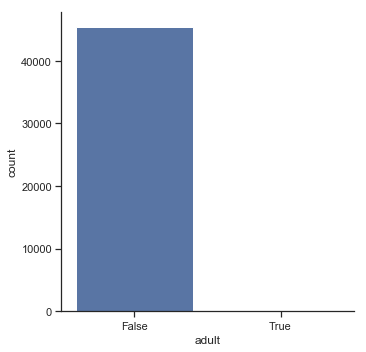

In [11]:
# 시각화
sns.catplot(x="adult", kind="count", data=metadata)

In [12]:
# collection, genres, status, video 변수들의 개수를 파악합니다.
print(metadata.belongs_to_collection.value_counts())
print(metadata['status'].value_counts())
print(metadata['video'].value_counts())

The Bowery Boys                             29
Totò Collection                             27
James Bond Collection                       26
Zatôichi: The Blind Swordsman               26
The Carry On Collection                     25
Pokémon Collection                          22
Charlie Chan (Sidney Toler) Collection      21
Godzilla (Showa) Collection                 16
Uuno Turhapuro                              15
Dragon Ball Z (Movie) Collection            15
Charlie Chan (Warner Oland) Collection      15
Monster High Collection                     14
The Land Before Time Collection             14
Sharpe Collection                           13
George Carlin Comedy Collection             13
The Amityville Horror Collection            12
Sherlock Holmes (1939 series)               12
Friday the 13th Collection                  12
Johan Falk GSI Collection                   12
Tom and Jerry Collection                    10
The Love Comes Softly Collection            10
Il Maresciall

In [19]:
# title 관련 변수 분석
metadata[metadata['original_title'] != metadata['title']][['title', 'original_title']].head()

,title,original_title
28,The City of Lost Children,La Cité des Enfants Perdus
29,Shanghai Triad,摇啊摇，摇到外婆桥
32,Wings of Courage,"Guillaumet, les ailes du courage"
57,The Postman,Il postino
58,The Confessional,Le confessionnal


In [20]:
metadata = metadata.drop('original_title', axis=1)

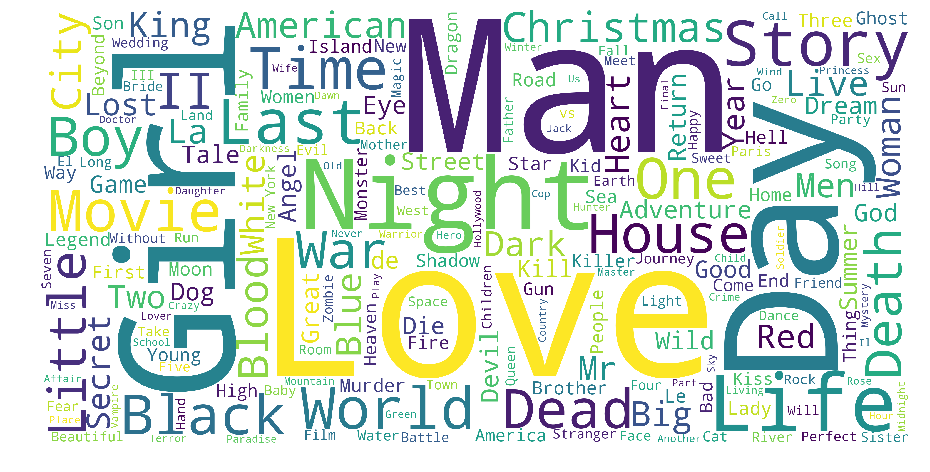

In [21]:
# title 변수를 wordcloud를 통해 살펴봅니다.
metadata['title'] = metadata['title'].astype('str')
title_corpus = ' '.join(metadata['title'])
title_wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white', height=2000, width=4000).generate(title_corpus)
plt.figure(figsize=(16,8))
plt.imshow(title_wordcloud)
plt.axis('off')
plt.show()

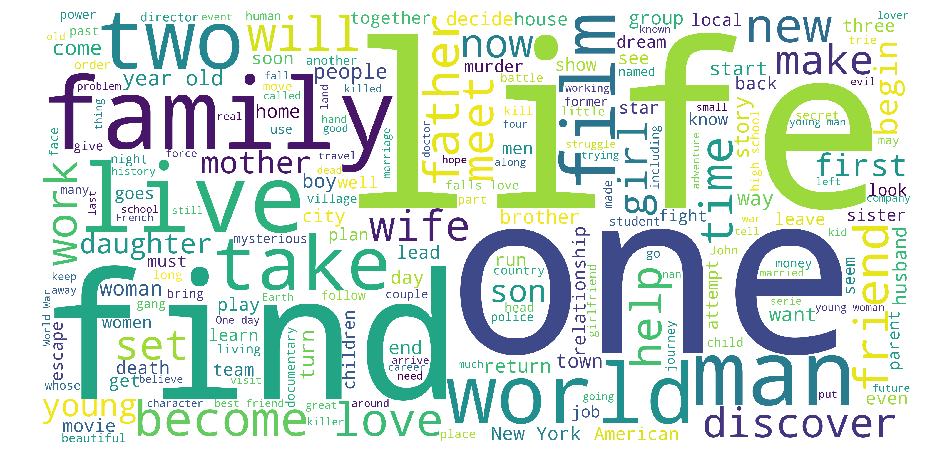

In [22]:
# overview 변수를 wordcloud를 통해 살펴봅니다.
metadata['overview'] = metadata['overview'].astype('str')
overview_corpus = ' '.join(metadata['overview'])
overview_wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white', height=2000, width=4000).generate(overview_corpus)
plt.figure(figsize=(16,8))
plt.imshow(overview_wordcloud)
plt.axis('off')
plt.show()

In [23]:
# 영화 장르 분석
s = metadata.apply(lambda x: pd.Series(x['genres']),axis=1).stack().reset_index(level=1, drop=True)
s.name = 'genre'
gen_df = metadata.drop('genres', axis=1).join(s)
gen_df['genre'].value_counts().shape[0]

20

In [24]:
pop_gen = pd.DataFrame(gen_df['genre'].value_counts()).reset_index()
pop_gen.columns = ['genre', 'movies']
pop_gen.head(10)

,genre,movies
0,Drama,20265
1,Comedy,13182
2,Thriller,7624
3,Romance,6735
4,Action,6596
5,Horror,4673
6,Crime,4307
7,Documentary,3932
8,Adventure,3496
9,Science Fiction,3049


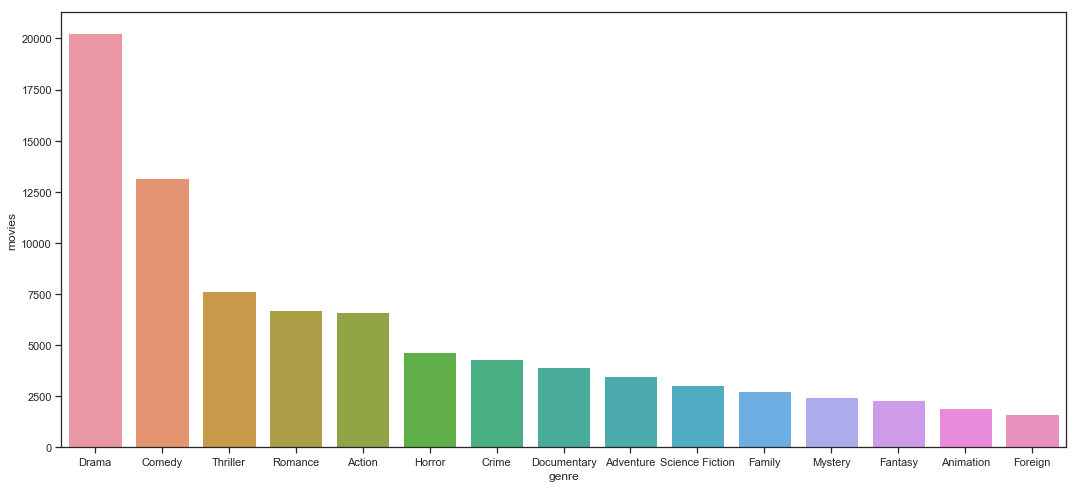

In [25]:
plt.figure(figsize=(18,8))
sns.barplot(x='genre', y='movies', data=pop_gen.head(15))
plt.show()

In [26]:
# revenue, budget 변수를 통한 영화 return 변수 생성
metadata[metadata['revenue'] == 0].shape

(38052, 21)

In [27]:
metadata['revenue'] = metadata['revenue'].replace(0, np.nan)

In [28]:
metadata['budget'] = pd.to_numeric(metadata['budget'], errors='coerce')
metadata['budget'] = metadata['budget'].replace(0, np.nan)
metadata[metadata['budget'].isnull()].shape

(36573, 21)

In [29]:
metadata['return'] = metadata['revenue'] / metadata['budget']
metadata[metadata['return'].isnull()].shape

(40082, 22)

In [30]:
# runtime 변수를 살펴본뒤 분포를 알아봅니다.
metadata['runtime'].describe()

count    45203.000000
mean        94.128199
std         38.407810
min          0.000000
25%         85.000000
50%         95.000000
75%        107.000000
max       1256.000000
Name: runtime, dtype: float64

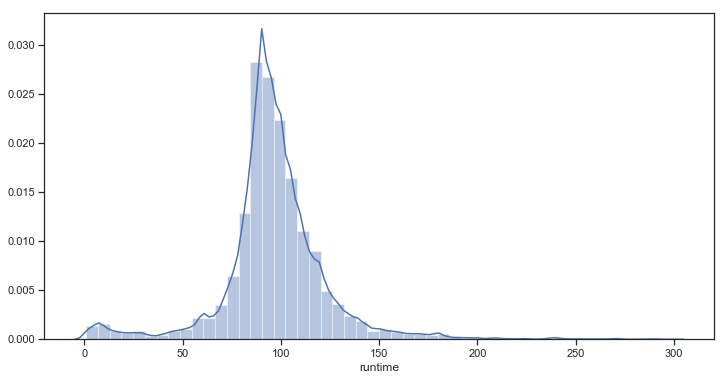

In [31]:
metadata['runtime'] = metadata['runtime'].astype('float')
plt.figure(figsize=(12,6))
sns.distplot(metadata[(metadata['runtime'] < 300) & (metadata['runtime'] > 0)]['runtime'])

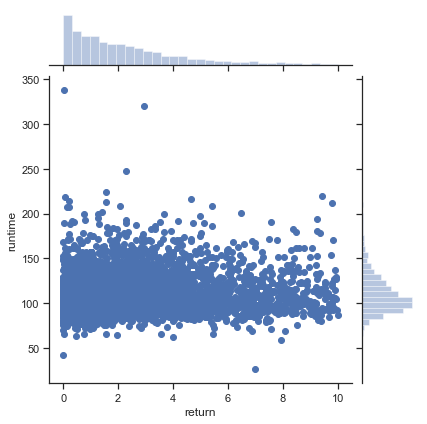

In [32]:
# runtime과 return 관계
df_mat = metadata[(metadata['return'].notnull()) & (metadata['runtime'] > 0) & (metadata['return'] < 10)]
sns.jointplot('return', 'runtime', data=df_mat)
plt.show()

In [33]:
# release_date 변수를 통한 영화 시간 분석
metadata['year'] = pd.to_datetime(metadata['release_date'], errors='coerce').apply(lambda x: str(x).split('-')[0] if x != np.nan else np.nan)
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
day_order = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

In [34]:
def get_month(x):
    try:
        return month_order[int(str(x).split('-')[1]) - 1]
    except:
        return np.nan

In [35]:
def get_day(x):
    try:
        year, month, day = (int(i) for i in x.split('-'))    
        answer = datetime.date(year, month, day).weekday()
        return day_order[answer]
    except:
        return np.nan

In [36]:
metadata['day'] = metadata['release_date'].apply(get_day)
metadata['month'] = metadata['release_date'].apply(get_month)

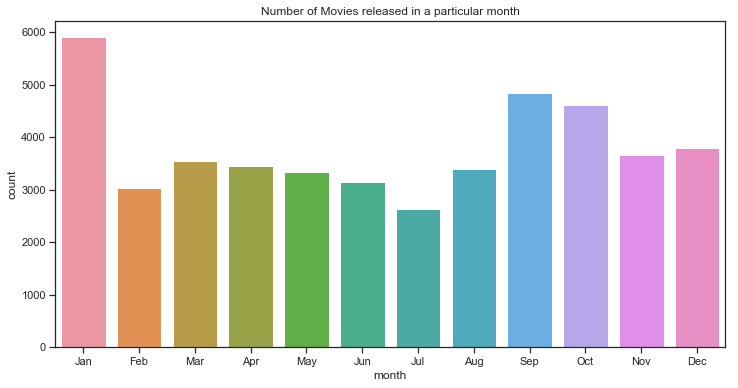

In [37]:
# 달별 영화 개봉 횟수
plt.figure(figsize=(12,6))
plt.title("Number of Movies released in a particular month")
sns.countplot(x='month', data=metadata, order=month_order)

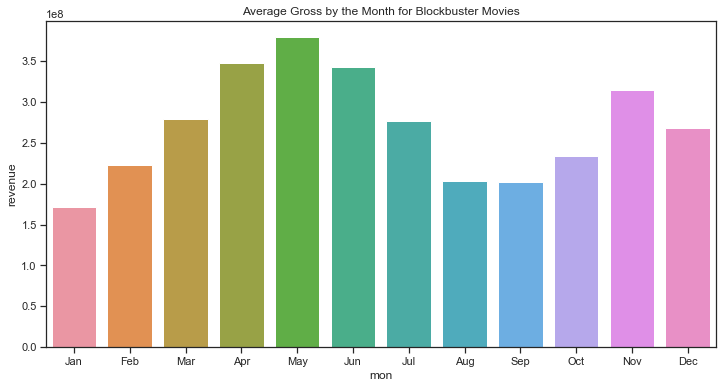

In [38]:
# 달별 일억달러 이상 수익낸 영화들의 수익
month_mean = pd.DataFrame(metadata[metadata['revenue'] > 1e8].groupby('month')['revenue'].mean())
month_mean['mon'] = month_mean.index
plt.figure(figsize=(12,6))
plt.title("Average Gross by the Month for Blockbuster Movies")
sns.barplot(x='mon', y='revenue', data=month_mean, order=month_order)

(0, 12)

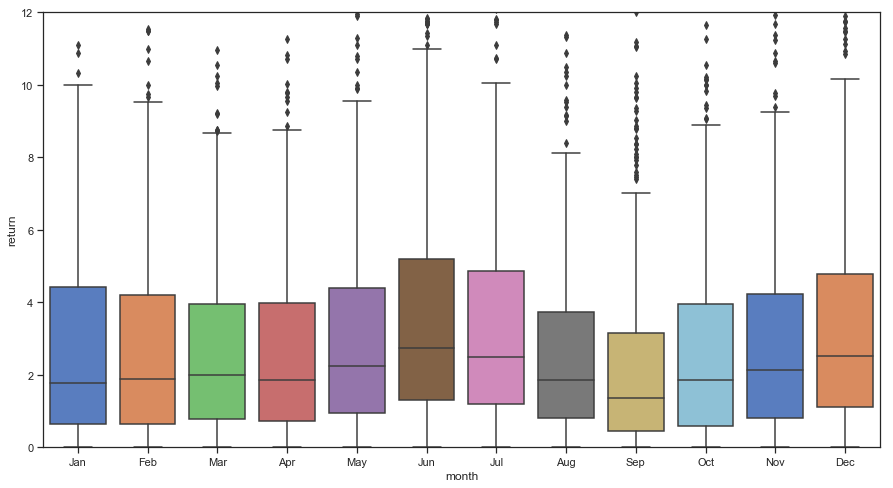

In [39]:
# 달별 영화 수익률
fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(15, 8))
sns.boxplot(x='month', y='return', data=metadata[metadata['return'].notnull()], palette="muted", ax =ax, order=month_order)
ax.set_ylim([0, 12])

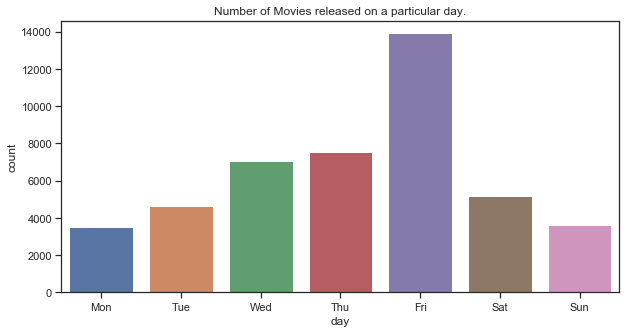

In [40]:
# 요일별 영화 개봉 횟수
plt.figure(figsize=(10,5))
plt.title("Number of Movies released on a particular day.")
sns.countplot(x='day', data=metadata, order=day_order)

In [41]:
# language 관련 변수 분석
metadata['original_language'].drop_duplicates().shape[0]

90

In [42]:
lang_df = pd.DataFrame(metadata['original_language'].value_counts())
lang_df['language'] = lang_df.index
lang_df.columns = ['number', 'language']
lang_df.head()

,number,language
en,32269,en
fr,2438,fr
it,1529,it
ja,1350,ja
de,1080,de


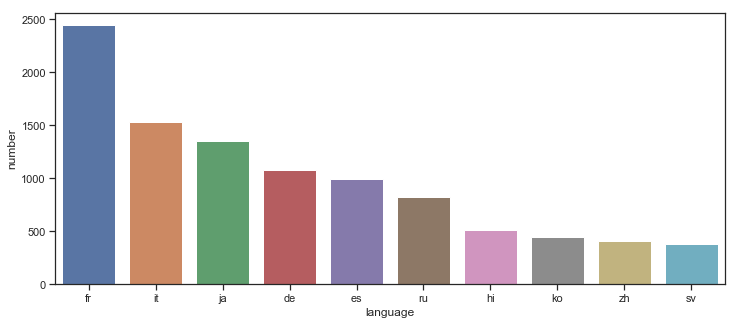

In [43]:
plt.figure(figsize=(12,5))
sns.barplot(x='language', y='number', data=lang_df.iloc[1:11])
plt.show()

In [44]:
# 10개 국어 이상 사용
metadata[metadata['spoken_languages'] >= 10][['title', 'year', 'spoken_languages']].sort_values('spoken_languages', ascending=False)

,title,year,spoken_languages
22235,Visions of Europe,2004,19
35288,The Testaments,2000,13
14093,To Each His Own Cinema,2007,12
8789,The Adventures of Picasso,1978,10


In [46]:
# production_countires 변수를 통한 제작 국가 관련 분석
s = metadata.apply(lambda x: pd.Series(x['production_countries']),axis=1).stack().reset_index(level=1, drop=True)

In [48]:
s.name = 'countries'
con_df = metadata.drop('production_countries', axis=1).join(s)
con_df = pd.DataFrame(con_df['countries'].value_counts())

In [45]:
con_df['country'] = con_df.index
con_df.columns = ['num_movies', 'country']
con_df = con_df.reset_index().drop('index', axis=1)
con_df.head(10)

,num_movies,country
0,21153,United States of America
1,4094,United Kingdom
2,3940,France
3,2254,Germany
4,2169,Italy
5,1765,Canada
6,1648,Japan
7,964,Spain
8,912,Russia
9,828,India


In [105]:
# 포스터 경로
base_poster_url = 'http://image.tmdb.org/t/p/w185/'
metadata['poster_path'] = "<img src='" + base_poster_url + metadata['poster_path'] + "' style='height:100px;'>"

In [106]:
# 최고 수익 영화
gross_top = metadata[['poster_path', 'title', 'budget', 'revenue', 'year']].sort_values('revenue', ascending=False).head(10)
pd.set_option('display.max_colwidth', 100)
HTML(gross_top.to_html(escape=False))

,poster_path,title,budget,revenue,year
14551,,Avatar,237000000.0,2.787965e+09,2009
26555,,Star Wars: The Force Awakens,245000000.0,2.068224e+09,2015
1639,,Titanic,200000000.0,1.845034e+09,1997
17818,,The Avengers,220000000.0,1.519558e+09,2012
25084,,Jurassic World,150000000.0,1.513529e+09,2015
28830,,Furious 7,190000000.0,1.506249e+09,2015
26558,,Avengers: Age of Ultron,280000000.0,1.405404e+09,2015
17437,,Harry Potter and the Deathly Hallows: Part 2,125000000.0,1.342000e+09,2011
22110,,Frozen,150000000.0,1.274219e+09,2013
42222,,Beauty and the Beast,160000000.0,1.262886e+09,2017


In [107]:
# 수치형 데이터 분석(popularity, vote_count, vote_average)
def clean_numeric(x):
    try:
        return float(x)
    except:
        return np.nan

In [108]:
metadata['popularity'] = metadata['popularity'].apply(clean_numeric).astype('float')
metadata['vote_count'] = metadata['vote_count'].apply(clean_numeric).astype('float')
metadata['vote_average'] = metadata['vote_average'].apply(clean_numeric).astype('float')

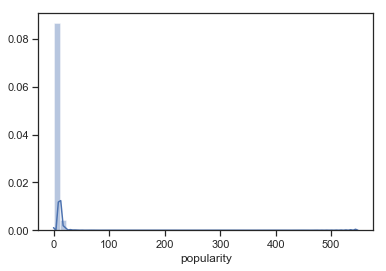

In [109]:
sns.distplot(metadata['popularity'].fillna(metadata['popularity'].median()))
plt.show()

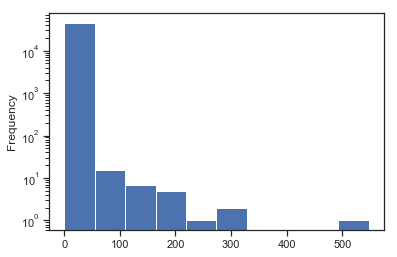

In [110]:
metadata['popularity'].plot(logy=True, kind='hist')

In [111]:
metadata['vote_average'] = metadata['vote_average'].replace(0, np.nan)
metadata['vote_average'].describe()

count    42462.000000
mean         6.014877
std          1.256208
min          0.500000
25%          5.300000
50%          6.100000
75%          6.900000
max         10.000000
Name: vote_average, dtype: float64

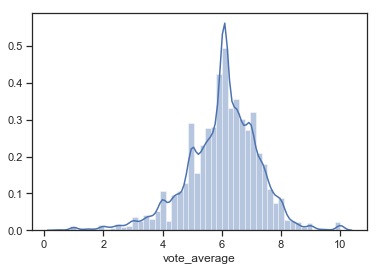

In [112]:
sns.distplot(metadata['vote_average'].fillna(metadata['vote_average'].median()))

In [113]:
metadata[metadata['vote_count'] > 2000][['title', 'vote_average', 'vote_count' ,'year']].sort_values('vote_average', ascending=False).head(10)

,title,vote_average,vote_count,year
314,The Shawshank Redemption,8.5,8358.0,1994
834,The Godfather,8.5,6024.0,1972
2211,Life Is Beautiful,8.3,3643.0,1997
5481,Spirited Away,8.3,3968.0,2001
1152,One Flew Over the Cuckoo's Nest,8.3,3001.0,1975
1176,Psycho,8.3,2405.0,1960
2843,Fight Club,8.3,9678.0,1999
1178,The Godfather: Part II,8.3,3418.0,1974
12481,The Dark Knight,8.3,12269.0,2008
292,Pulp Fiction,8.3,8670.0,1994


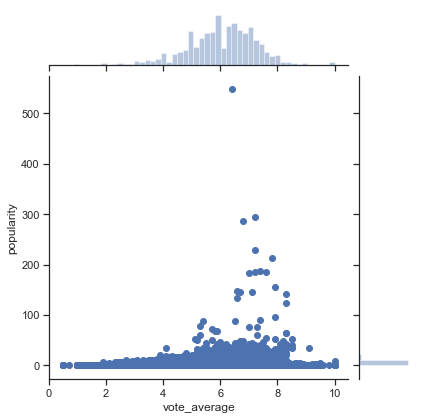

In [114]:
sns.jointplot(x='vote_average', y='popularity', data=metadata)